In [29]:
from numpy.lib.recfunctions import stack_arrays
import glob
import root_numpy
import uproot
from pandas import HDFStore

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Get the required files
df_sig = pd.read_hdf('mc16ae_Honly_sig_NN_var.h5', 'df_sig')
df_bkg2 = pd.read_hdf('mc16a_qZZ_bkg_NN_var.h5','df_bkg2')
#get 1 jet events
df_sig1j = df_sig[df_sig['n_jets']==1]
df_bkg21j = df_bkg2[df_bkg2['n_jets']==1]
#df_sig1j.head()
df_sig.shape
df_bkg2.shape

(42998, 16)

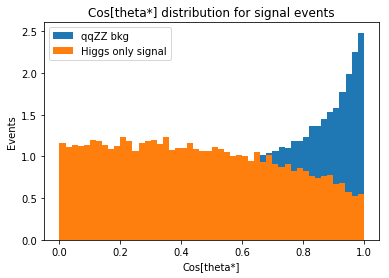

In [31]:
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg2['cos_theta_str'].plot(kind='hist', bins=50, rwidth=1, density=True, label='qqZZ bkg')
df_sig['cos_theta_str'].plot(kind='hist', bins=50, rwidth=1, density=True, label='Higgs only signal')

plt.title('Cos[theta*] distribution for signal events')
plt.xlabel('Cos[theta*]')
plt.ylabel('Events')
ax.legend()
plt.show()

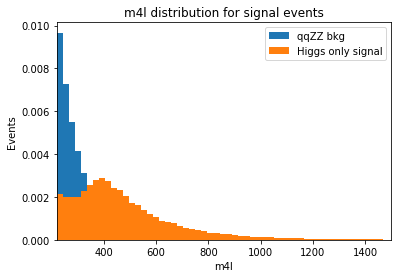

In [34]:
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg2['m4l_unconstrained'].plot(kind='hist', bins=100, rwidth=1, density=True, label='qqZZ bkg')
df_sig['m4l_unconstrained'].plot(kind='hist', bins=100, rwidth=1, density=True, label='Higgs only signal')

plt.title('m4l distribution for signal events')
plt.xlabel('m4l')
plt.ylabel('Events')
ax.set_xlim([220, 1500])
ax.legend()
plt.show()

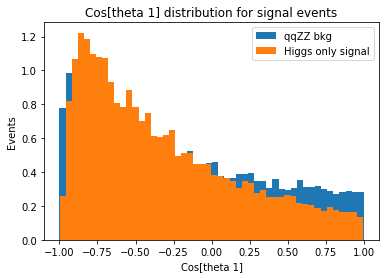

In [4]:
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg2['cos_theta_1'].plot(kind='hist', bins=50, rwidth=1, density=True, label='qqZZ bkg')
df_sig['cos_theta_1'].plot(kind='hist', bins=50, rwidth=1, density=True, label='Higgs only signal')

plt.title('Cos[theta 1] distribution for signal events')
plt.xlabel('Cos[theta 1]')
plt.ylabel('Events')
ax.legend()
plt.show()

In [5]:
#define the log of the ME as a new column
df_sig['ln_ggHZZ_ME_0j'] = np.log10(df_sig['ggHZZ_ME_0j'])
df_bkg2['ln_ggHZZ_ME_0j'] = np.log10(df_bkg2['ggHZZ_ME_0j'])
df_sig['ln_qqZZ_ME_0j'] = np.log10(df_sig['qqZZ_ME_0j'])
df_bkg2['ln_qqZZ_ME_0j'] = np.log10(df_bkg2['qqZZ_ME_0j'])
df_sig1j['ln_ggHZZ_ME_0j'] = np.log10(df_sig['ggHZZ_ME_0j'])
df_bkg21j['ln_ggHZZ_ME_0j'] = np.log10(df_bkg2['ggHZZ_ME_0j'])
df_sig1j['ln_ggHZZ_ME_1j'] = np.log10(df_sig['ggHZZ_ME_1j'])
df_bkg21j['ln_ggHZZ_ME_1j'] = np.log10(df_bkg2['ggHZZ_ME_1j'])


/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [11]:
df_bkg2.head()

lepton_eta   lepton_pt  lepton_phi  lepton_m  n_jets  \
entry subentry                                                         
0     0           0.451412   79.700165   -2.650723  0.105658       2   
      1          -1.018288   21.267000   -0.912381  0.105658       2   
      2          -0.146135  111.429993    1.594542  0.105658       2   
      3          -0.501760  136.210968    0.997097  0.105658       2   
1     0           0.212422   39.501736   -1.268922  0.000511       0   

                  ggZZ_ME_0j    ggZZ_ME_1j   ggHZZ_ME_0j   ggHZZ_ME_1j  \
entry subentry                                                           
0     0         6.046652e-11  1.324001e-12  1.440624e-11  6.677612e-17   
      1         6.046652e-11  1.324001e-12  1.440624e-11  6.677612e-17   
      2         6.046652e-11  1.324001e-12  1.440624e-11  6.677612e-17   
      3         6.046652e-11  1.324001e-12  1.440624e-11  6.677612e-17   
1     0         1.053160e-09  9.900000e+01  3.541273e-12  9.900000e+01   

                  qqZZ_ME_0j    qqZZ_ME_1j  m4l_unconstrained  cos_theta_str  \
entry subentry                                                                 
0     0         3.640778e-09  6.020556e-12         338.923279       0.291423   
      1         3.640778e-09  6.020556e-12         338.923279       0.291423   
      2         3.640778e-09  6.020556e-12         338.923279       0.291423   
      3         3.640778e-09  6.020556e-12         338.923279       0.291423   
1     0         2.961242e-08  9.900000e+01         224.629913       0.971901   

                cos_theta_1  fsr_pt       phi     phi_1       Z1_m       Z2_m  \
entry subentry                                                                  
0     0           -0.038929  -999.0  2.374264  1.746715  91.240489  84.842599   
      1           -0.038929  -999.0  2.374264  1.746715  91.240489  84.842599   
      2           -0.038929  -999.0  2.374264  1.746715  91.240489  84.842599   
      3           -0.038929  -999.0  2.374264  1.746715  91.240489  84.842599   
1     0           -0.573159  -999.0 -0.677362  1.953149  90.276481  94.756294   

                ln_ggHZZ_ME_0j  
entry subentry                  
0     0             -10.841449  
      1             -10.841449  
      2             -10.841449  
      3             -10.841449  
1     0             -11.450841

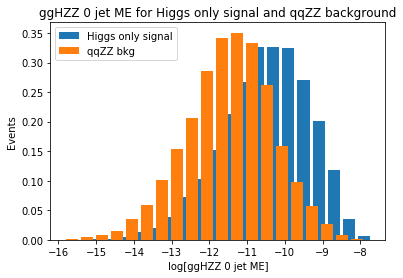

In [6]:
ax = plt.subplot(111)
df_sig['ln_ggHZZ_ME_0j'].plot(kind='hist', bins=20, rwidth=0.80,density=True, label='Higgs only signal')
df_bkg2['ln_ggHZZ_ME_0j'].plot(kind='hist', bins=20, rwidth=0.80, density=True, label='qqZZ bkg')
plt.title('ggHZZ 0 jet ME for Higgs only signal and qqZZ background')
plt.xlabel('log[ggHZZ 0 jet ME]')
plt.ylabel('Events')
ax.legend()
plt.show()

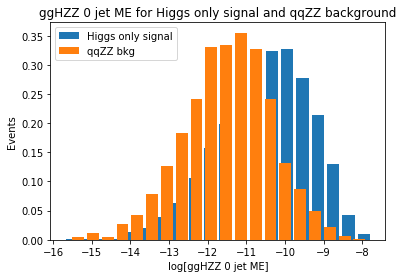

In [7]:
ax = plt.subplot(111)
df_sig1j['ln_ggHZZ_ME_0j'].plot(kind='hist', bins=20, rwidth=0.80,density=True, label='Higgs only signal')
df_bkg21j['ln_ggHZZ_ME_0j'].plot(kind='hist', bins=20, rwidth=0.80, density=True, label='qqZZ bkg')
plt.title('ggHZZ 0 jet ME for Higgs only signal and qqZZ background')
plt.xlabel('log[ggHZZ 0 jet ME]')
plt.ylabel('Events')
ax.legend()
plt.show()

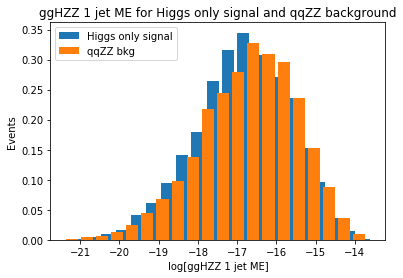

In [8]:
ax = plt.subplot(111)
df_sig1j['ln_ggHZZ_ME_1j'].plot(kind='hist', bins=20, rwidth=0.80,density=True, label='Higgs only signal')
df_bkg21j['ln_ggHZZ_ME_1j'].plot(kind='hist', bins=20, rwidth=0.80, density=True, label='qqZZ bkg')
plt.title('ggHZZ 1 jet ME for Higgs only signal and qqZZ background')
plt.xlabel('log[ggHZZ 1 jet ME]')
plt.ylabel('Events')
ax.legend()
plt.show()

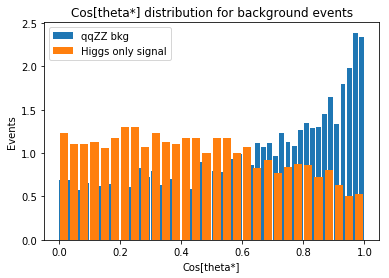

In [15]:
plt.show()
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg21j['cos_theta_str'].plot(kind='hist', bins=50, rwidth=0.80, density=True, label='qqZZ bkg')
df_sig1j['cos_theta_str'].plot(kind='hist', bins=30, rwidth=0.80,density=True, label='Higgs only signal')

plt.title('Cos[theta*] distribution for background events')
plt.xlabel('Cos[theta*]')
plt.ylabel('Events')
ax.legend()
#ax.set_xlim([0, 600])
plt.show()

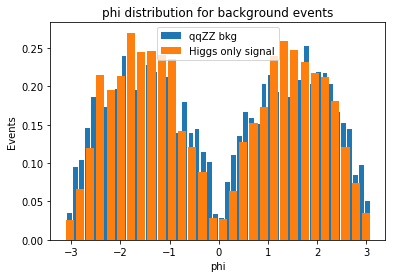

In [16]:
plt.show()
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg21j['phi'].plot(kind='hist', bins=50, rwidth=0.80, density=True, label='qqZZ bkg')
df_sig1j['phi'].plot(kind='hist', bins=30, rwidth=0.80,density=True, label='Higgs only signal')

plt.title('phi distribution for background events')
plt.xlabel('phi')
plt.ylabel('Events')
ax.legend()
#ax.set_xlim([0, 600])
plt.show()


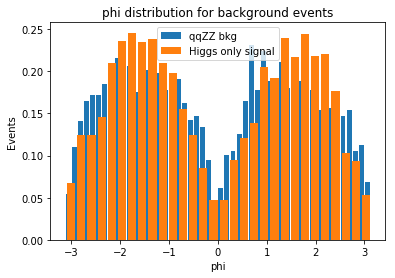

In [18]:
plt.show()
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg21j['phi_1'].plot(kind='hist', bins=50, rwidth=0.80, density=True, label='qqZZ bkg')
df_sig1j['phi_1'].plot(kind='hist', bins=30, rwidth=0.80,density=True, label='Higgs only signal')

plt.title('phi distribution for background events')
plt.xlabel('phi')
plt.ylabel('Events')
ax.legend()
#ax.set_xlim([0, 600])
plt.show()


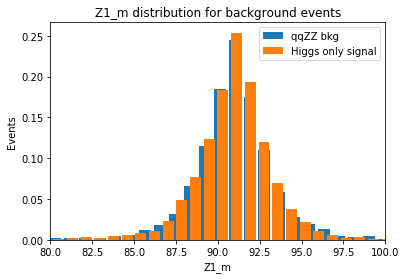

In [22]:
plt.show()
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg21j['Z1_m'].plot(kind='hist', bins=50, rwidth=0.80, density=True, label='qqZZ bkg')
df_sig1j['Z1_m'].plot(kind='hist', bins=50, rwidth=0.80,density=True, label='Higgs only signal')

plt.title('Z1_m distribution for background events')
plt.xlabel('Z1_m')
plt.ylabel('Events')
ax.legend()
ax.set_xlim([80, 100])
plt.show()


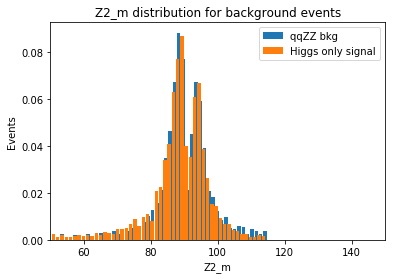

In [24]:
plt.show()
ax=plt.subplot(111)
#plt.hist(df_sig['cos_theta_str'], 50)
df_bkg21j['Z2_m'].plot(kind='hist', bins=50, rwidth=0.80, density=True, label='qqZZ bkg')
df_sig1j['Z2_m'].plot(kind='hist', bins=50, rwidth=0.80,density=True, label='Higgs only signal')

plt.title('Z2_m distribution for background events')
plt.xlabel('Z2_m')
plt.ylabel('Events')
ax.legend()
ax.set_xlim([50, 150])
plt.show()
